## Exercise 0: Dataset Preprocessing

1) Read the winequality-red dataset and dropped nan vlues using dropna. <br>
2) Checked for non numeric columns using .info(). There are no non numeric columns<br>
3) Then the x data is normalized and the bias is added. Thent the data is splitted using train_test_split of sklearn<br>
3) Similary the trainig data and testing data is created for the Regression Dataset as per the given instructions of initialization.

In [6]:
import numpy as np
import pandas as pd
np.random.seed(3116) #set seed as required
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

In [7]:
wine= pd.read_csv('winequality-red.csv',sep=";")
wine.dropna(inplace=True)
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [9]:
wine.shape

(1599, 12)

In [10]:
# No non numeric columns

In [11]:
# def normalizing_data(df)
x=wine.drop(columns='quality')
mean=x.mean()
stdv=x.std()
x_norm=(x-mean)/stdv
x_data=x_norm.to_numpy()

#adding bias
ones= np.ones((x_data.shape[0],1))
x_data =np.concatenate((ones,x_data),axis=1)

y_data=wine['quality'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train_w,x_test_w,y_train_w,y_test_w=train_test_split(x_data,y_data,test_size = 0.2, random_state = 3116)
print(x_train_w.shape,x_test_w.shape,y_train_w.shape,y_test_w.shape)


(1279, 12) (320, 12) (1279,) (320,)


In [13]:
mu,sigma=1,0.05
m,n=100,1
x_data_1=np.random.normal(mu,sigma,(m,n))
phi=np.random.uniform(-0.5,0.5,(m,1))
y_data_1=1.3*x_data_1**2+4.8*x_data_1+8+phi

In [14]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_data_1,y_data_1,test_size = 0.2, random_state = 3116)
print(x_train_1.shape,x_test_1.shape,y_train_1.shape,y_test_1.shape)


(80, 1) (20, 1) (80, 1) (20, 1)


## Generalized Linear Models with Scikit Learn 

**In previous labs you have implemented various optimization algorithms to solve linear or logistic regression
problem. In this task you are required to use Scikit Learn to experiment with following linear models
and Stochastic Gradient Descent (SGD) [Hint: use SGDRegressor]. You may use scikit learn for this
question.**<br>

1. Ordinary Least Squares<br>
2. Ridge Regression<br>
3. LASSO<br>

**1. Split your data into Train and Test Splits according to the 80%:20% ratio. Use dataset D2**<br>
**2. For each model, pick three sets of hyperparameters and learn each model (without cross validation).Measure Train and Test RMSE and plot it on one plot. Explain the plots and relate it to the theorystudied in lectures i.e. influence of regularized vs non-regularized models. You have to compare thefollowing models and argument should explain underfitting and overfitting.**<br>

**Approach**<br>

**ordinary least square**
1)The data was already split in preprocessing step. <br>
2)I took fixed steplength and 3 set of hyperparametr alpha.<br>
3)imported the SGD regressor from sklearn<br>
4)Using "SGDRegressor(penalty=None, alpha=0,shuffle=True)" the model is taken as "reg"<br> 
5)The the given data  is fit into this model using.fit()<br>
6)from this learnt model, the y_hat is predicted on train and test data./<br>
7)For evaluating the RMSE, square root  of mean squared error is done. This meansquared error is imported from sklearn.<br>
8) The obtained test and train RMSE are plotted. <br>

**Lasso & Ridge**
1)For Lasso(L1) and Ridge(L2) models, a for loop is taken, to iterate over this models. In the inner loop, for each model, for each hyperparameer alpha, the y_hat is predicted as per the above procedure. This alpha is given as argument to the SGD Regressor.<br>
2) From these predictions, RMSE test and train are plotted.<br>
**Comment is added below the plot.**


In [19]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
lr=0.001
alpha=[0.05,1e-2,1e-3]

In [281]:
#OLS 
reg=SGDRegressor(penalty=None, alpha=0,shuffle=True) 
reg=reg.fit(x_train_w, y_train_w)
y_hat_train_o=reg.predict(x_train_w)
y_hat_test_o=reg.predict(x_test_w)
RMSE_train_o=(np.sqrt(mean_squared_error(y_train_w, y_hat_train_o)))
RMSE_test_o=(np.sqrt(mean_squared_error(y_test_w, y_hat_test_o)))

# Lasso and Ridge
RMSE_train_r = []
RMSE_test_r= []
RMSE_train_l=[]
RMSE_test_l=[]

for k in ['l2','l1']:
    for i in alpha:
        if k=='l2':
            reg_r=SGDRegressor(penalty=k, alpha=i,eta0=lr,learning_rate='constant').fit(x_train_w, y_train_w)
            RMSE_train_r.append(np.sqrt(mean_squared_error(y_train_w, reg_r.predict(x_train_w))))
            RMSE_test_r.append(np.sqrt(mean_squared_error(y_test_w, reg_r.predict(x_test_w))))
        else:
            reg_l=SGDRegressor(penalty=k, alpha=i,eta0=lr,learning_rate='constant').fit(x_train_w, y_train_w)
            RMSE_train_l.append(np.sqrt(mean_squared_error(y_train_w, reg_l.predict(x_train_w))))
            RMSE_test_l.append(np.sqrt(mean_squared_error(y_test_w, reg_l.predict(x_test_w))))

In [284]:
print(f"RMSE_train_ordinaryry:{RMSE_train_o}")   
print(f"RMSE_test_ordinary:{RMSE_test_o}")
print("---------------------------------")
print(f"RMSE_train_Ridge:{RMSE_train_r}")
print(f"RMSE_test_Ridge:{RMSE_test_r}")
print("---------------------------------")
print(f"RMSE_train_Lasso:{RMSE_train_l}")
print(f"RMSE_test_Lasso:{RMSE_test_l}")

RMSE_train_ordinaryry:0.6365843113340156
RMSE_test_ordinary:0.6852787488290066
---------------------------------
RMSE_train_Ridge:[0.6395695484920644, 0.6368246668413899, 0.6366890503898064]
RMSE_test_Ridge:[0.686280370833106, 0.6840724156112469, 0.6866865568163502]
---------------------------------
RMSE_train_Lasso:[0.6501944242852187, 0.6384432952267551, 0.6367508665644421]
RMSE_test_Lasso:[0.6877633571510974, 0.6835698903412503, 0.6847556306394795]


Text(0, 0.5, 'RMSE')

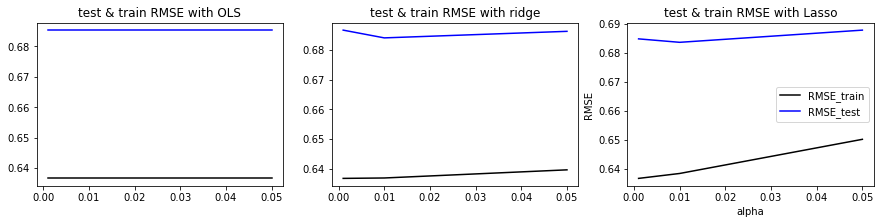

In [285]:
import matplotlib.pyplot as plt
fig, pos = plt.subplots(1,3)
fig.set_figheight(3)
fig.set_figwidth(15)
Rmse_train_o,Rmse_test_0=[RMSE_train_o]*len(alpha),[RMSE_test_o]*len(alpha)
RMSE_train=[Rmse_train_o,RMSE_train_r,RMSE_train_l]
RMSE_test=[Rmse_test_0,RMSE_test_r,RMSE_test_l]
title=['OLS','ridge','Lasso']

for i in range(3):
    pos[i].plot(alpha,RMSE_train[i],'black',label='RMSE_train')
    pos[i].plot(alpha,RMSE_test[i],'blue',label='RMSE_test')
    pos[i].set_title(f"test & train RMSE with {title[i]}")
 
plt.legend()
plt.xlabel('alpha')
plt.ylabel('RMSE')

**Comment**
From the above plots, it observed that,<br>
In lasso and ridge regression models,
1) For the taken steplength lr=0.001, and 3 set of lamda vlues i.e alpha=[0.05,1e-2,1e-3], the part to the left of  graph before 0.01 is said to be overfitting. This is because, in this region, as the lamda decreasing(regularization decreasing) further, the test RMSE is increasing while train RMSE is still decreasing which is the secnario of overfitting i.e the model is trying to cover all instances in train data and is failing to predict accurately in test data.<br>.

2) If we take the right part of the graph ie, after lamda=0.01, the test RMSE and train RMSE both are increasing as lamda increases(regularization increases). This is the case of underfitting where model is failing to fit the intances in both test and training data.<BR>

3)The point of lamda=0.01 can be called as the soft point, where best fit takes place in both test and train data  with apprropriate regularization.<BR>

4)At this point, when RMSE values are compared with all the models. They are like this<BR>
Model----Train RMSE-----Test RMSE<br>
OLS----0.6365843113340156----0.6852787488290066<br>
Ridge----0.6368246668413899----0.6840724156112469<br>
Lasso----0.6384432952267551-----0.6835698903412503<br>
    
The best minimum test RMSE seen at soft point of aplpha=0.01 in the model that used Lasso regression with least Test RMSE as 0.6835698903412503. Ridge Test RMSE is little high to that of Lasso but less than ordinary least square method. This shows the effect of regularization in improvingt the RMSE.
    
   

### 3. Now tune the hyperparameters using scikit learn GridSearchCV and plot the results of cross validation for each model. [Hint: use GridSearchCV object method cv_results to see different metrics]

**Approach**

**OLS**
1) For grid search, set of 7 learing rates and lamdas are taken.<br>
2) for ordinary least square, model is taken as reg using SGDRegressor. The penality is zero.<br>
3) For Grid search with cross validation CV=5, "GridSearchCV" is used. And the results are shown using model_grid_o.cv_results. <br>
4) The mean squared reults are taken uing ".cv_results_['mean_train_score']".The results are plotted. <br>
5) The model is moving towards least mean square as the learning rate decrease in both test and train data.<br>

Ref: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

In [20]:
from sklearn.model_selection import GridSearchCV

lr=[1,0.7,0.5,0.3,0.1,0.01,0.00001]
alpha=[1, 0.7, 0.5, 0.3, 0.1, 0.01, 0.00001]

In [21]:
#Ordinary least square
param={'eta0':lr}
reg=SGDRegressor(penalty=None, alpha=0,learning_rate='constant',random_state=3116)
model_grid_o=GridSearchCV(reg,param,return_train_score=True).fit(x_train_w,y_train_w)
model_grid_o.cv_results_

{'mean_fit_time': array([0.00207992, 0.00127726, 0.00116405, 0.0010437 , 0.00097432,
        0.0010705 , 0.01054039]),
 'std_fit_time': array([3.47208950e-04, 2.36368300e-04, 1.59129540e-04, 1.25032813e-04,
        7.56583862e-05, 9.14566957e-05, 3.74287100e-05]),
 'mean_score_time': array([0.00586767, 0.00047984, 0.00041261, 0.00036492, 0.00039153,
        0.00035233, 0.0003665 ]),
 'std_score_time': array([1.02405822e-02, 1.33425189e-04, 1.11215416e-04, 2.02667573e-05,
        6.65377347e-05, 1.09832067e-05, 7.21806096e-06]),
 'param_eta0': masked_array(data=[1, 0.7, 0.5, 0.3, 0.1, 0.01, 1e-05],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'eta0': 1},
  {'eta0': 0.7},
  {'eta0': 0.5},
  {'eta0': 0.3},
  {'eta0': 0.1},
  {'eta0': 0.01},
  {'eta0': 1e-05}],
 'split0_test_score': array([-6.45434123e+25, -4.16142153e+25, -8.84765304e+24, -9.16872860e+24,
        -4.99574320e+23,  4.10702645e-01,  3.

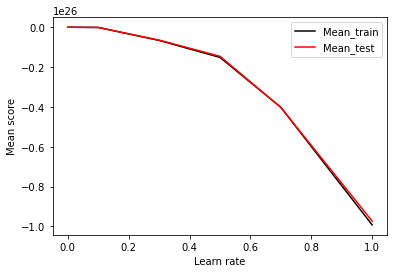

The model is moving towards least mean square as the learning rate decrease in both test and train data.


In [22]:
x=lr
y_tr=model_grid_o.cv_results_['mean_train_score']
y_te=model_grid_o.cv_results_['mean_test_score']
plt.plot(x,y_tr,'black',label='Mean_train')
plt.plot(x,y_te,'red',label='Mean_test')
plt.xlabel('Learn rate')
plt.ylabel('Mean score')
plt.legend()
plt.show()
plt.close()

print("The model is moving towards least mean square as the learning rate decrease in both test and train data.")

**Gridsearch for Ridge and Lasso**

1) For grid search, the hyper parameters are to be given as dictionary keys and values.I gave in the same way.<br>
2) For ridge and lasso, the models reg_r and reg_l are created using "SGDRegressor" wiht penality "l2" and "l1". <br>
3) Then "GridsearchCV" is used that takes the model reg, hyperparameter dicionary and scoring metric as arguments.<br>
4) To this,  wine data set i.e x_train_w,y_train_w are fitted using .fit()<br>
5) The Mean squared error of test and train data are collected into a grid and plotted them against learning rate and alpha/lamda

In [23]:
#Ridge
hyper_param={'eta0':lr, 'alpha':alpha}
reg_r=SGDRegressor(learning_rate='constant',penalty='l2',random_state=3116)
grid_r= GridSearchCV(reg_r,hyper_param,return_train_score=True,scoring='neg_mean_squared_error').fit(x_train_w,y_train_w)

#Lasso
reg_l=SGDRegressor(learning_rate='constant',penalty='l1',random_state=3116)
grid_l= GridSearchCV(reg_l,hyper_param,return_train_score=True,scoring='neg_mean_squared_error').fit(x_train_w,y_train_w)

In [24]:
# calculating meanscore grid for ridge for plotting
MSE_train_r=grid_r.cv_results_['mean_train_score']
MSE_test_r=grid_r.cv_results_['mean_test_score']
MSE_train_grid_r,MSE_test_grid_r= np.zeros((len(lr),len(alpha))),np.zeros((len(lr),len(alpha)))

# calculating meanscore grid for lasso for plotting
MSE_train_l=grid_l.cv_results_['mean_train_score']
MSE_test_l=grid_l.cv_results_['mean_test_score']
MSE_train_grid_l,MSE_test_grid_l= np.zeros((len(lr),len(alpha))),np.zeros((len(lr),len(alpha)))

k=0
for i in range(len(lr)):
    for j in range(len(alpha)):
        MSE_train_grid_r[i,j],MSE_test_grid_r[i,j]=MSE_train_r[k],MSE_test_r[k]   # calculating MSE ridge grid
        MSE_train_grid_l[i,j],MSE_test_grid_l[i,j]=MSE_train_l[k],MSE_test_l[k]   # calculating MSE Lasso grid
        k+=1       

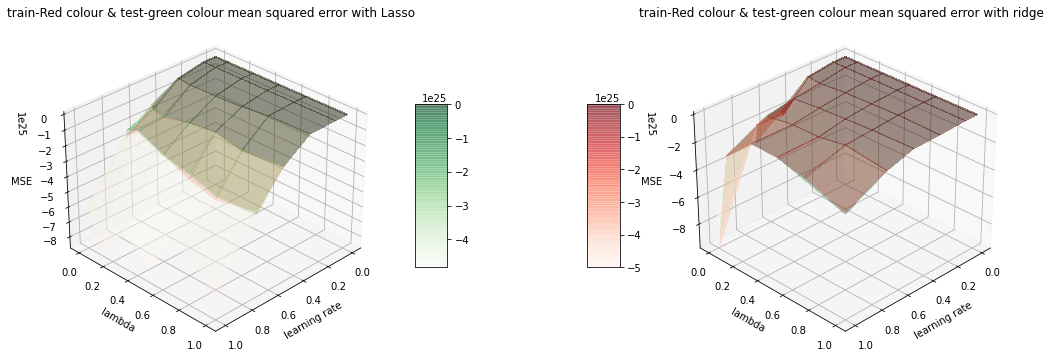

In [25]:
#plotting
fig = plt.figure(figsize=(40,6))
x,y = np.meshgrid(lr, alpha)
MSE_train_list,MSE_test_list=[MSE_train_grid_r,MSE_train_grid_l],[MSE_test_grid_r,MSE_test_grid_l]
title=['ridge','Lasso']
for i in range(2):
    ax = fig.add_subplot(1,i+1,1, projection='3d')
    surf = ax.plot_surface(x, y, MSE_train_list[i], cmap='Reds',
                           linewidth=0, antialiased=False,alpha=0.3)
    surf1 = ax.plot_surface(x, y, MSE_test_list[i], cmap='Greens',
                           linewidth=0, antialiased=False,alpha=0.3)
    ax.view_init(30, 45)
    ax.set_xlabel('learning rate')
    ax.set_ylabel('lambda')
    ax.set_zlabel('MSE ')
    ax.set_title(f"train-Red colour & test-green colour mean squared error with {title[i]}")
fig.colorbar(surf, shrink=0.5,aspect=5)
fig.colorbar(surf1, shrink=0.5,aspect=5)
plt.show()


### For better understanding of the regularization effect, MSE plots on test data and train data are again plotted using the best step length of above grid search, calculated in next section  i.e lr=0.01. The alpha parameter is varied. 
Best parameters obtained using grid search in next section  are<br>
best_param_lr_OLS: 0.01<br>
best_param_lr,alpha of ridge: 0.01 0.1<br>
best_param_lr,alpha of lasso: 0.01 0.01<br>
**Approach**<br>
1)Similar to the above grid search, here fixed best steplegth is taken and alpha is varied.<br>
2) The obtained results are plotted.Regularization effect is commented below the plots <br>

In [83]:
lr=[0.01]
#Ridge
hyper_param={'eta0':lr,'alpha':alpha}
reg_r=SGDRegressor(learning_rate='constant',penalty='l2',random_state=3116)
grid_r= GridSearchCV(reg_r,hyper_param,return_train_score=True,scoring='neg_mean_squared_error').fit(x_train_w,y_train_w)

#Lasso
reg_l=SGDRegressor(learning_rate='constant',penalty='l1',random_state=3116)
grid_l= GridSearchCV(reg_l,hyper_param,return_train_score=True,scoring='neg_mean_squared_error').fit(x_train_w,y_train_w)

In [84]:
# calculating meanscore grid for ridge for plotting
MSE_train_r=(-1)*grid_r.cv_results_['mean_train_score']  # negated as the grid search tries to maximize.
MSE_test_r=(-1)*grid_r.cv_results_['mean_test_score']
# calculating meanscore grid for lasso for plotting
MSE_train_l=(-1)*grid_l.cv_results_['mean_train_score']
MSE_test_l=(-1)*grid_l.cv_results_['mean_test_score']
#OLS
MSE_train_o=model_grid_o.cv_results_['mean_train_score']
MSE_test_o=model_grid_o.cv_results_['mean_test_score']

Text(0, 0.5, 'MSE')

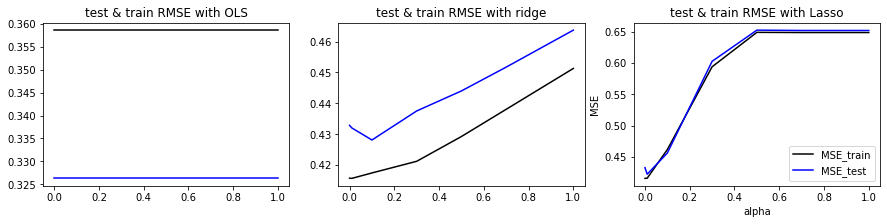

In [85]:
import matplotlib.pyplot as plt
fig, pos = plt.subplots(1,3)
fig.set_figheight(3)
fig.set_figwidth(15)
MSE_train_o,MSE_test_o=[MSE_train_o[5]]*len(alpha),[MSE_test_o[5]]*len(alpha)
MSE_train=[MSE_train_o,MSE_train_r,MSE_train_l]
MSE_test=[MSE_test_o,MSE_test_r,MSE_test_l]
title=['OLS','ridge','Lasso']

for i in range(3):
    pos[i].plot(alpha,MSE_train[i],'black',label='MSE_train')
    pos[i].plot(alpha,MSE_test[i],'blue',label='MSE_test')
    pos[i].set_title(f"test & train RMSE with {title[i]}")
 
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')

**Comment**<br>
1) best parameters are calculated in next section. Best alpha for Lasso is found to be 0.01 adn ridge model is 0.1.<br>
2) When plots are compared, the plots to the left side  best alphas i.e 0.1 in ridge and 0.01 in Lasso, the model is over fitting. The test RMSE is inceasing while the train RMSE is still decreasing. Which is the overfittinng phenomenon as already mentioned above.<BR>
3) In the same way, the right portion after the best alphas, the test and train MSE are both increasing which is underfitting phenomenon. <br>
4) From these observations of the graph, it can be said taht, the obtained best alpha using Grid search is the best soft point, where the model is at good fit for the best learning lr=0.01

## 4. Using the optimal hyperparameter you have to evaluate each model on the Test Set. Report the results in a meaningful manner.

**Approach**<br>
1) From the above gridsearchCV results, bets_parameters from each model are obtained using".best_params_". The results are printed out.<br>
2) Then each model is trained on test data with best hyperparameters obtained using SGD regressor. <br>
3) Then the trained model is evaluated on test data and calculated the test predictions.<br>
4) The test_RMSE is calculated over these test predictions and and actual labels.<br>
5) The obtained best test_RMSE of each model are plotted in a line graph.<br>
6) As per the plot,with optimal paprameters found in gridsearchCV, the model with Lasso reglarization is showing the least RMSE, that is showing the best performance among the others.  And there is no significant difference between Ridge RMSE and Lasso RMSE<br>
Ref: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

In [26]:
best_param_lr_OLS=model_grid_o.best_params_['eta0']
best_param_lr_ridge,best_param_alpha_ridge=grid_r.best_params_['eta0'],grid_r.best_params_['alpha']
best_param_lr_lasso,best_param_alpha_lasso=grid_l.best_params_['eta0'],grid_l.best_params_['alpha']
print("best_param_lr_OLS:", best_param_lr_OLS)
print("best_param_lr,alpha of ridge:", best_param_lr_ridge,best_param_alpha_ridge)
print("best_param_lr,alpha of lasso:", best_param_lr_lasso,best_param_alpha_lasso)

best_param_lr_OLS: 0.01
best_param_lr,alpha of ridge: 0.01 0.1
best_param_lr,alpha of lasso: 0.01 0.01


In [27]:
# Evaluate each model on the Test Set with best parameters
from sklearn.model_selection import cross_val_score
#OLS
reg_o=SGDRegressor(penalty=None,shuffle=True,learning_rate='constant',eta0=best_param_lr_OLS,random_state=3116).fit(
                                                                                          x_train_w,y_train_w)
RMSE_test_o=np.sqrt(mean_squared_error(y_test_w, reg_o.predict(x_test_w)))

#Ridge
reg_r=SGDRegressor(penalty='l2',learning_rate='constant',eta0=best_param_lr_ridge,alpha=best_param_alpha_ridge,random_state=3116).fit(
                                                                                         x_train_w,y_train_w)
RMSE_test_r=np.sqrt(mean_squared_error(y_test_w, reg_r.predict(x_test_w)))

# Lasso
reg_l=SGDRegressor(penalty='l1',learning_rate='constant',eta0=best_param_lr_lasso,alpha=best_param_alpha_lasso,random_state=3116).fit(
                                                                                         x_train_w,y_train_w)
RMSE_test_l=np.sqrt(mean_squared_error(y_test_w, reg_l.predict(x_test_w)))

In [28]:
print("RMSE_test_OLS:",RMSE_test_o)
print("RMSE_test_Ridge:",RMSE_test_r)
print("RMSE_test_Lasso:",RMSE_test_l)

RMSE_test_OLS: 0.7233583231747686
RMSE_test_Ridge: 0.7097512102803732
RMSE_test_Lasso: 0.7083264417678523


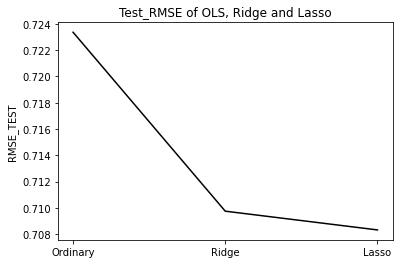

In [29]:
x=['Ordinary','Ridge','Lasso']
RMSE_test=[RMSE_test_o,RMSE_test_r,RMSE_test_l]
plt.plot(x,RMSE_test,'black',label='RMSE_test')
plt.ylabel('RMSE_TEST')
plt.title("Test_RMSE of OLS, Ridge and Lasso")
plt.show()
plt.close()

**Comment**<br>
From the above plot, with optimal paprameters found in gridsearchCV on each model, the model with Lasso reglarization is showing the least RMSE, that is showing the best performance among the others. But there is no significant difference between Lasso and Ridge RMSE  